In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./data/haarcascade_eye.xml')
print(face_cascasde, eye_cascade)

<CascadeClassifier 000002981D57D190> <CascadeClassifier 000002983F5CE0D0>


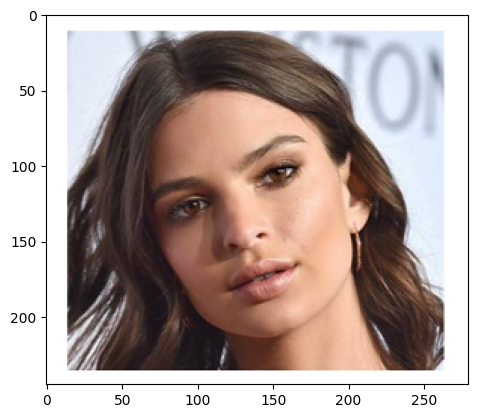

In [5]:
img = cv2.imread('./data/face.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# 얼굴 감지

얼굴좌표:  49 48 161 161


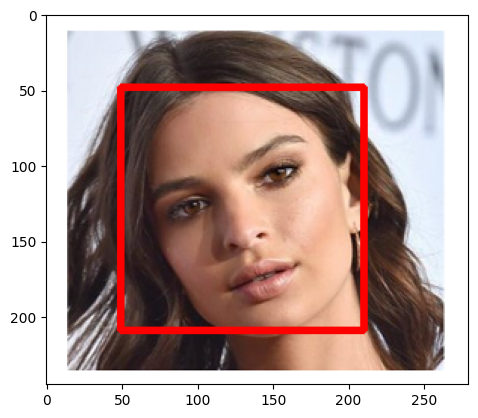

In [8]:
# 케이스케이드는 그레이 이미지에만 작동
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

faces = face_cascade.detectMultiScale(img_gray, 1.1, 4)   # detectMultiScale(이미지, 축소할 이미지 배율, 이웃의 최소 수)

for (x,y,w,h) in faces:
    print('얼굴좌표: ', x,y,w,h)
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)
    
plt.imshow(img)
plt.show()

# 눈 감지

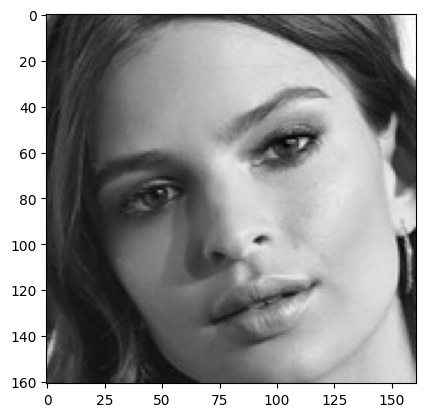

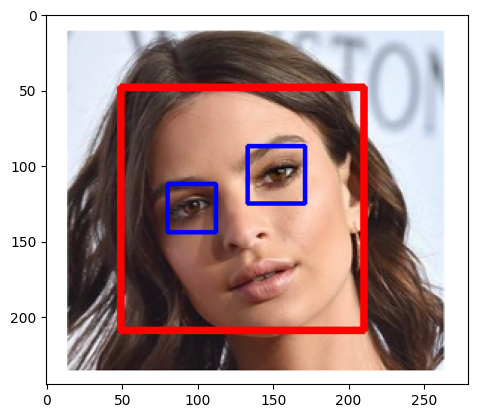

In [11]:
# 관심 영역 생성 (얼굴 감지에서 detect 된 얼굴 박스)
roi_gray = img_gray[y:(y+h), x:(x+w)]
roi_color = img[y:(y+h), x:(x+w)]
plt.imshow(roi_gray,'gray')
plt.show()

eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
index = 0

for (ex,ey,ew,eh) in eyes:
    if index == 0:
        eye1 = (ex,ey,ew,eh)
    else:
        eye2 = (ex,ey,ew,eh)
        
    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,0,255), 2)
    
    index +=1

plt.imshow(img)
plt.show()

# 왼쪽눈, 오른쪽눈 지정

In [13]:
if eye1[0] < eye2[0]:
    left_eye = eye1
    right_eye = eye2
else:
    left_eye = eye2
    right_eye = eye1

print(left_eye, right_eye)

(31, 64, 32, 32) (84, 39, 38, 38)


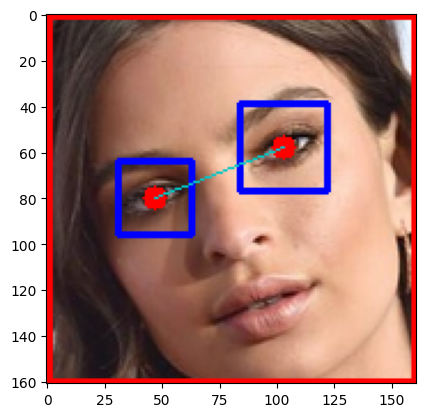

In [14]:
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0]
left_eye_y = left_eye_center[1]

right_eye_center = (int(right_eye[0] + (right_eye[2] / 2)), int(right_eye[1] + (right_eye[3] / 2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]

cv2.circle(roi_color, left_eye_center, 5, (255,0,0), -1)
cv2.circle(roi_color, right_eye_center, 5, (255,0,0), -1)
cv2.line(roi_color, right_eye_center, left_eye_center, (0,200,200), 1)

plt.imshow(roi_color)
plt.show()

# 수평선 그리기

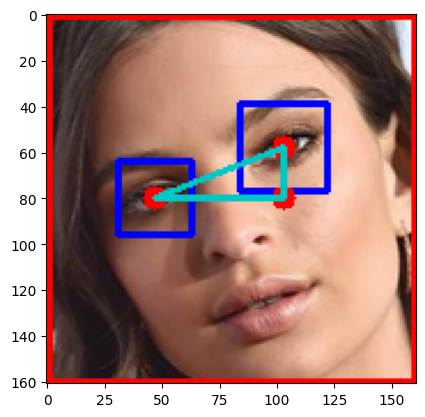

In [15]:
if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
    direction = -1
else:
    A = (left_eye_x, right_eye_y)
    direction = 1
    
cv2.circle(roi_color, A, 5, (255,0,0), -1)
cv2.line(roi_color, right_eye_center, left_eye_center, (0,200,200), 2)
cv2.line(roi_color, right_eye_center, A, (0,200,200), 2)
cv2.line(roi_color, left_eye_center, A, (0,200,200), 2)

plt.imshow(roi_color)
plt.show()

# 각도 구하기

In [16]:
delta_x = right_eye_x - left_eye_x     # 밑변
delta_y = right_eye_y - left_eye_y     # 높이

angle = np.arctan(delta_y / delta_x)
angle = (angle*180) / np.pi
print(angle)

-21.447736327105353


# 사진 회전

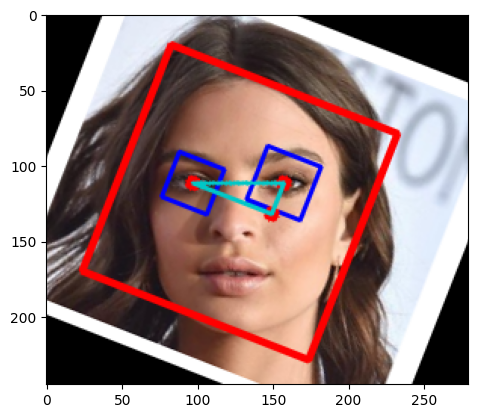

In [18]:
# 사진의 너비, 높이
height, width, _ = img.shape

center = (width//2, height//2)

M = cv2.getRotationMatrix2D(center, (angle), 1.0)
img_rotated = cv2.warpAffine(img, M, (width, height))

plt.imshow(img_rotated)
plt.show()